In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#text = pd.read_csv('combined_csv.csv')
#text

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
!pip install git+https://github.com/boudinfl/pke.git
!python -m nltk.downloader stopwords
!python -m nltk.downloader universal_tagset
!python -m spacy download en # download the english model

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
!pip install langcodes
import pke

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-uhbzyfle
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-uhbzyfle
     |████████████████████████████████| 245kB 12.1MB/s 
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8763600 sha256=a52144e7c9c48bde66dc512ddb37a59e6000957f97f1d9c46aa8ce0bdf3acd59
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfkiv8fx/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
Successfully built pke
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
!pip install wikipedia
import wikipedia as wiki

def checkingInfo(word):
  if not wiki.search(word):
    return ''
  else :
    return wiki.search(word)[0]

def keyWordsExtraction(input):
  #Convert text to lower case:
  input_str = input.lower()
  #Remove number if it is not relevant to ur analysis:
  #input_str = re.sub(r'\d+', '', input_str)
  #Remove punctuation:
  input_str = input_str.translate(str.maketrans('', '', string.punctuation))
  #Remove white space:
  input_str = input_str.strip()
  #lemmatizer=WordNetLemmatizer()
  #input_str=word_tokenize(input_str)
  #input_str= ' '.join([lemmatizer.lemmatize(w) for w in input_str])


  stop_words = list(stopwords.words('english'))
  extras = list(['including'])
  # 1. create a TfIdf extractor.
  extractor = pke.unsupervised.TfIdf()
  # 2. load the content of the document.
  extractor.load_document(input_str,
                        language='en',
                        normalization=True)
  # 3. select {1-3}-grams not containing punctuation marks as candidates.
  extractor.candidate_selection(n=3, stoplist=list(string.punctuation)+stop_words+extras)
  # 4. weight the candidates using a `tf` x `idf`
  extractor.candidate_weighting()
  # 5. get the 15-highest scored candidates as keyphrases
  keyphrases= extractor.get_n_best(n=15,stemming=True,redundancy_removal=True)
  unzip = [[ i for i, j in keyphrases], 
        [ j for i, j in keyphrases ]] 
  words= unzip[0]
  singleton = list()
  phrase = list()
  for x in words:
    if ' ' in x :
      phrase.append(x)
    else :
     singleton.append(x)

 

  a = nltk.pos_tag(phrase)
  b = [word for word, tag in a if tag in ('NN', 'VBG')]
  c = b.copy()

  for k in range(0, len(b)):
    if any(element in b[k] for element in stoplist):
     c.remove(b[k])

  for i in range(0,len(c)):
    print([c[i],checkingInfo(c[i])]) 

  res = ''

  if len(c) != 0: 
   d = np.array([checkingInfo(item) for item in c]) 
   d = d[d!='']
   res = ','.join(np.unique(d))
  
  return res

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def keyWordsExtraction(input):
  #Convert text to lower case:
  input_str = input.lower()
  #Remove number if it is not relevant to ur analysis:
  #input_str = re.sub(r'\d+', '', input_str)
  #Remove punctuation:
  input_str = input_str.translate(str.maketrans('', '', string.punctuation))
  #Remove white space:
  input_str = input_str.strip()
  #lemmatizer=WordNetLemmatizer()
  #input_str=word_tokenize(input_str)
  #input_str= ' '.join([lemmatizer.lemmatize(w) for w in input_str])


  stop_words = list(stopwords.words('english'))
  extras = list(['including'])
  # 1. create a TfIdf extractor.
  extractor = pke.unsupervised.TfIdf()
  # 2. load the content of the document.
  extractor.load_document(input_str,
                        language='en',
                        normalization=True)
  # 3. select {1-3}-grams not containing punctuation marks as candidates.
  extractor.candidate_selection(n=3, stoplist=list(string.punctuation)+stop_words+extras)
  # 4. weight the candidates using a `tf` x `idf`
  extractor.candidate_weighting()
  # 5. get the 15-highest scored candidates as keyphrases
  keyphrases= extractor.get_n_best(n=15,stemming=True,redundancy_removal=True)
  unzip = [[ i for i, j in keyphrases], 
        [ j for i, j in keyphrases ]] 
  words= unzip[0]
  singleton = list()
  phrase = list()
  for x in words:
    if ' ' in x :
      phrase.append(x)
    else :
     singleton.append(x)

 

  a = nltk.pos_tag(phrase)
  b = [word for word, tag in a if tag in ('NN', 'VBG')]
  c = b.copy()

  for k in range(0, len(b)):
    if any(element in b[k] for element in stoplist):
     c.remove(b[k])

  for i in range(0,len(c)):
    print([c[i],checkingInfo(c[i])]) 

  res = ''

  if len(c) != 0: 
   d = np.array([checkingInfo(item) for item in c]) 
   d = d[d!='']
   res = ','.join(np.unique(d))
  
  return a


text = pd.read_csv('All_conf.csv')
description =     text['description'].values.tolist()
keyWordsExtraction(description[0])

FileNotFoundError: ignored

In [ ]:
description[0]

In [ ]:
keyWordsExtraction(description[0])

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
def entityExtraction(input):
  nlp = en_core_web_sm.load()
  doc = nlp(input)
  table = [(X.text) for X in doc.ents if X.label_ is 'GPE' or X.label_ is 'ORG' or X.label_ is 'PRODUCT']
  result = Counter(table).keys()
  res = list(result)
  return ','.join(res)

In [ ]:
def calString(input):
  input_str = input.translate(str.maketrans('', '', string.punctuation))
  input_str = input_str.strip()
  return len(word_tokenize(input_str))

In [ ]:
def getINC(input):
  nlp = en_core_web_sm.load()
  doc = nlp(input)
  table = [(X.text) for X in doc.ents if X.label_ == 'PERSON']
  res = ','.join(table)
  if ',' in res:
    a = res.split(',')
    res = a[0]
  return res


In [ ]:
def clean(input):
  return input.lower().replace(' / ',',').replace(' & ',',')

In [ ]:
text = pd.read_csv('All_conf.csv')
#inc =      text['Inc'].values.tolist()
description =     text['description'].values.tolist()
#title =    text['Title'].values.tolist()


final = pd.DataFrame ({}, columns = ['Length','Keywords','Entity'])
for i in range(len(text)):
  #company = inc[i]
  KandS   = keyWordsExtraction(description[i])
  ent = entityExtraction(description[i])
  add = pd.DataFrame({         
                      "Length":    [calString(description[i])],   
                      "Keywords":  [KandS],
                      "Entity":    [ent]
                      })
  final = final.append(add, ignore_index=True)
final

In [ ]:
stoplist=['also discus',
'still',
'well',
'present',
'drone',
'first',
'large',
'every',
'cause',
'sufficiently',
'streamlined',
'unique approach',
'using',
'current effort',
'often',
'benchmark tool spatter',
'upcoming',
'several',
'poster present',
'technical detail',
'take',
'poster show',
'tackle',
'trust',
'well',
'previous work',
'defense method',
'highly',
'relatively',
'asynchronous execution',
'currently',
'experience',
'neural chemistry',
'joining',
'combining',
'board range',
'furthermore',
'desire',
'getting lot',
'like',
'faster',
'show breakthrough performance',
'various deep',
'model like mask',
'take lot',
'label noise',
'neighborhood ann search',
'massive scaling',
'ai solution',
'ha moved beyond',
'moved beyond research',
'move faster',
'solving',
'target',
'many',
'tqi ha',
'highest quality',
'leading',
'domestic intelligent video',
'manually',
'well introduce',
'owner still face',
'design factor',
'particle problem',
'featuring',
'since 2018',
'actively',
'provide',
'simple multicamera',
'multicamera medium server',
'diverse combination',
'four gate',
'recent success',
'human feedback',
'video demostration',
'third person video',
'opensource ml framework',
'evaluate',
'three novel',
'novel design criterion',
'recent',
'achieved',
'japan research',
'various',
'extract',
'discus',
'covering',
'social medium',
'deep learning ha',
'essential element',
'product talk',
'clara',
'latest feature',
'continue',
'increasing',
'often',
'latest performance',
'reference framework',
'anomalous event',
'de novo',
'ai software',
'dl application',
'patient journey',
'collectively',
'best treatment',
'shown promising',
'ai offer',
'analysis iga ha',
'san francisco',
'wideranging',
'powerful technique',
'rapid advancement',
'opensource contribution',
'talk cover',
'feature like realtime',
'various consideration',
'scan time',
'substantially',
'dramatic',
'reinvneted',
'skeletal injury',
'like much',
'iowa',
'taken many fields',
'relatively little use',
'ha begun',
'pacc help lower',
'language instruction',
'coffee maker',
'dl model',
'current profiling',
'highly',
'characterize ideal',
'teaching kit',
'front line',
'last september',
'milwaukee',
'certain object feature',
'important task',
'active topic',
'surface texture',
'drug response hidden',
'world however',
'present unique challenge',
'elevated',
'synthesis vid2vid',
'core application',
'md engine',
'shanghai jiao',
'imply',
'well explain',
'sciencetific advancement',
'important reducing',
'minion device',
'well report',
'well present submit',
'without',
'completing',
'approach combine',
'ongoing work',
'poster present',
'tasking framework',
'poster cover',
'making progress',
'resolving speed',
'cost challenge',
'realtime performance',
'immersive experience',
'two decade',
'cpu render',
'biggest pain',
'widely',
'care center',
'continually looking',
'gtc 2019',
'substance alchemist',
'produce hole distortion',
'obscured part',
'application like graph',
'rd team',
'video game technology',
'year wide',
'significant progress',
'system show great',
'show great performance',
'bike demand',
'worldwide one',
'one important',
'create',
'product presentation design',
'presentation design review',
'vehicle industry ha',
'many company',
'core problem',
'broad range',
'road user',
'deepti mahajan',
'daytoday life',
'related topic',
'topic first',
'hd map',
'current real world',
'employ',
'application workload',
'robust sensor',
'panoptic segmentation deep',
'digital road',
'continued advance',
'autonomous vehicle company',
'well talk',
'also leading',
'onboard processing',
'nvidias metropolis application',
'virtual validation vv',
'general strength',
'vv briefly',
'ha machine',
'ha machine learning',
'share insight',
'best architecture',
'intelligent scenario',
'common solution many',
'project however',
'magnitude smaller',
'new possibility',
'exciting world',
'talk ill',
'streaming platform part',
'platform part ',
'recent decade',
'knowledge quiz show',
'right question',
'dimension like never',
'player perform',
'jeopardy',
'active user',
'twitter',
'training complex image',
'intelligently connecting',
'connecting',
'infinite world',
'new possibility',
'company around',
'michal would',
'best practice',
'painful pushing',
'make split second',
'reallife story',
'method much effort',
'fun part',
'part ie training',
'favorite performance',
'intelligence give retailer',
'great opportunity',
'experience convinience',
'cause issue',
'gaining insight',
'large amount',
'whole different',
'generating new',
'ha mature',
'offline analysis',
'lacked option',
'prominent comment',
'building amazing',
'bi solution',
'basic building',
'innovative solution',
'require manually',
'development wa',
'phenomenal growth',
'many challenge',
'incredibly sophisticated',
'short introduction',
'many different',
'empty phrase meaning',
'flank stack',
'phrase meaning everything',
'build fast',
'since everybody',
'sound super',
'vague sense',
'organisation question',
'common use',
'provide tip',
'good practice',
'exciting yet getting',
'race wa',
'soviet union',
'beautiful window',
'pose real limit',
'answer nontrivial question',
'key new challenge',
'industry 40',
'huge ethical gap',
'without leaving',
'build machine',
'best manage',
'huge mass',
'processing model ha',
'otherwise inaccurate',
'widespread excitement',
'fairness accountability',
'practice case',
'ai kane',
'wide us',
'sucessful implementation',
'key enabler',
'session mat',
'interesting segment',
'get high',
'web visitor',
'fast data',
'covid19',
'spreading across',
'posing',
'goverment try',
'since 2013',
'minimum passenger',
'overfilled vehicle',
'idea development',
'ingesting billion',
'multiple',
'ai solution',
'significant challenge',
'comapny trying',
'ai technologist',
'keynote address',
'kristine',
'kristine dery',
'people work',
'true anywhere organization',
'basic tenet',
'team attempt',
'katie king',
'confusion hype',
'surrounding',
'well fargo',
'christy punch',
'inside look',
'responsible part',
'include redesigning',
'impact every aspect',
'work transformation',
'today workplace',
'still moving',
'often left',
'exceptional pace',
'exclusive group',
'challenging part',
'biggest workplace',
'hootsuite ha',
'enjoyed rapid growth',
'rapid growth',
'since',
'best learning',
'invisible adjusting',
'team dwindling',
'flexible working ha',
'support employee',
'employee journey',
'pandemic ha',
'new urgency',
'constant change',
'procedure come',
'siobhan',
'fagan',
'sarah kimmel',
'report key',
'fast company',
'year interviewing',
'digital workplace experience',
'putting employee',
'disconnected application',
'exclusive group',
'connected culture',
'exceed expectation',
'project team',
'change management',
'imperative grew',
'right',
'key trend across',
'across department function',
'workplace make',
'industry ha',
'second look',
'ear organization',
'better business',
'company must',
'work otherwise',
'risk leaving',
'covid',
'hybrid',
'unifying platform',
'doe change',
'really feel like',
'mass global shift',
'permeate',
'every',
'lower cost increase',
'explore nine',
'technology operating',
'impacting every',
'stay ahead',
'competition also',
'help reshape',
'unified identity',
'development adoption',
'cloud present',
'coming next',
'development team',
'epm development leader',
'trailblazing customer',
'onpremises software',
'inmemory functionality',
'lost person',
'land payload',
'people around',
'lightweight',
'model explosive weapon',
'finding']
stoplist

In [ ]:
!pip install pytrends
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
def display_scores(vectorizer, tfidf_result):
    # http://stackoverflow.com/questions/16078015/
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))



display_scores(tfidfvectorizer, tfidf_wm)

In [ ]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

X = new_df.drop("Industry", axis=1)
y = new_df["Industry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_pred, y_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_pred, y_test)
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
raw = pd.read_csv('ALL_DATA.csv', encoding='Latin-1')
raw.pop("Singleton")
raw.pop('Length')
raw.pop('Entity')
df = raw.replace(np.nan, '', regex=True)
df

FileNotFoundError: ignored

In [ ]:
import collections

def highlightedTopic(text, entities):
  filter = df[df[entities] == text]
  train = list(filter.Keywords)
  t = [item.split(',') for item in train]
  flat_list = []
  for sublist in t:
    for item in sublist:
        flat_list.append(item)
  counter = collections.Counter(flat_list)
  c= counter.most_common()
  return c[:10]


In [ ]:
highlightedTopic('Hazelcast','Inc')

In [ ]:
highlightedTopic('SHI GmbH','Inc')

In [ ]:
highlightedTopic('Code4Thought','Inc')

In [ ]:
train = list(df.Keywords)
t = [item.split(',') for item in train]
flat_list = []
for sublist in t:
    for item in sublist:
        flat_list.append(item)
flat_list

In [ ]:
import os
import re
import math

class PageManager(object):
    """Class for managing pages."""

    def __init__(self):
        self.pages = {}

    def load_with_title(self, title):
        """Load the page with given title."""

        if title in self.pages.keys():
            return
        url = "http://en.wikipedia.org/wiki/" + title
        self.pages[title] = Page(url)

    def sort_page_relevance(self, title):
        """Return a sorted list of titles and relevance sorted by relevance
        Relevance is determined by the ratio of common links from both pages
        to total number of links in the second."""
        self.load_with_title(title)
        relevance = []
        page = self.pages[title]
        for t in self.pages:
            ratio = page.get_common_link_ratio(self.pages[t])
            relevance.append((t, ratio))
        relevance.sort(key= lambda x: x[1])
        relevance.reverse()
        return relevance



class Page(object):

    def __init__(self, url):
        self.url = url
        # http://en.wikipedia.org/wiki/TITLE#INNER_LINK
        self.title = url.split("/")[-1].split("#")[0]
        self.title = self.title.replace('%27',"'")
        self.read_page()
        self.get_main_div()
        self.find_links()

    def read_page(self):
        """Read the page
        Tries to read from local disk first. If the file is not found,
        it is downloaded."""
        try:
            tempfile = open(self.title)
        except FileNotFoundError:
            os.system("wget '{}'".format(self.url))
            tempfile = open(self.title)
        self.lines = tempfile.readlines()
        tempfile.close()

    def get_main_div(self):
        self.main_div_content = []
        started = False
        for line in self.lines:
            if not started:
                if line.strip().startswith('<div id="bodyContent'):
                    self.main_div_content.append(line)
                    started = True
            else:
                if line.strip().startswith('<div id="mw-navigation'):
                    break
                self.main_div_content.append(line)
        # Rip off first generic lines (links to search etc.)
        self.main_div_content = self.main_div_content[9:]

    def find_links(self):
        self.links = []
        for line in self.main_div_content:
            match = re.search('/wiki/([a-zA-Z_:]*)', line)
            if not match: continue
            if ":" not in match.group(1): self.links.append(match.group(1))
        self.links = set(self.links)

    def find_common_links(self, page):
        common_links =[]
        for link in self.links:
            if link in page.links:
                common_links.append(link)
        return common_links

    def count_common_links(self, page):
        return len(self.find_common_links(page))

    def get_common_link_ratio(self, page):
        count = self.count_common_links(page)
        return math.tan(((count/(len(page.links)+len(self.links)))*math.pi/2))



In [ ]:
import math
math.tan(0.5*math.pi/2)

In [ ]:
b = [item.replace(' ', '_') for item in flat_list]
c = [item.replace('\x96','–')for item in b]
a = [item.replace("'",'%27')for item in c]
#index = a.index("Parkinson's_disease")
#a[index] = 'Parkinson%27s_disease'
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove('')
a.remove("You_didn%27t_build_that")

In [ ]:
a

In [ ]:
page_manager = PageManager()
example_titles = a

for title in example_titles:
  page_manager.load_with_title(title)
  if (len(Page(title).links)==0):
   print(title)
   
#print(page_manager.pages["Data_science"].get_common_link_ratio(page_manager.pages["Directive_(programming)"]))
#print(page_manager.pages["Data_science"].get_common_link_ratio(page_manager.pages["Dog"]))
#print(page_manager.pages["data_science"].get_common_link_ratio(page_manager.pages["artificial_intelligence"]))
#print(page_manager.pages["Data_science"].get_common_link_ratio(page_manager.pages["Machine_learning"]))
#print(page_manager.pages["List_of_Nvidia_graphics_processing_units"].get_common_link_ratio(page_manager.pages["Nvidia"]))
    
    

In [ ]:
page_manager = PageManager()
example_titles = ['data_science','dog','artificial_intelligence']

for title in example_titles:
  page_manager.load_with_title(title)

print(page_manager.pages["artificial_intelligence"].get_common_link_ratio(page_manager.pages["dog"]))
print(page_manager.pages["data_science"].get_common_link_ratio(page_manager.pages["dog"]))
print(page_manager.pages["data_science"].get_common_link_ratio(page_manager.pages["artificial_intelligence"]))

In [ ]:
df['Keywords'] = df['Keywords'].apply(lambda x: ''.join([item.replace(' ', '_') for item in x]))
df['Keywords'] = df['Keywords'].apply(lambda x: ''.join([item.replace('\x96','–')for item in x]))
df['Keywords'] = df['Keywords'].apply(lambda x: ''.join([item.replace("'",'%27')for item in x]))
df

In [ ]:
df[df['Keywords'] != '']

In [ ]:
FullKey = df[df['Keywords'] != '']
e = list(FullKey.Inc.unique())
len(e)
initializeMatrix = np.zeros((len(e), len(e)))
initializeMatrix.shape
for i in range(0,len(e)):
  for j in range(0,len(e)):
    comp1 = FullKey[FullKey['Inc'] == e[i]]
    comp2 = FullKey[FullKey['Inc'] == e[j]]
    list1 = [item.split(',') for item in comp1['Keywords'].values]
    list2 = [item.split(',') for item in comp2['Keywords'].values]
    flatten1 = []
    for sublist in list1:
      for item in sublist:
        flatten1.append(item)

    flatten2 = [] 
    for sublist in list2:
      for item in sublist:
        flatten2.append(item)
    #Filter 1
    if ("You_didn%27t_build_that" in flatten1):
      flatten1.remove("You_didn%27t_build_that")
    if ("Average_selling_price" in flatten1):
      flatten1.remove("Average_selling_price")
    if ("Business_domain" in flatten1):
      flatten1.remove("Business_domain")
    #Filter 2
    if ("You_didn%27t_build_that" in flatten2):
      flatten2.remove("You_didn%27t_build_that")
    if ("Average_selling_price" in flatten2):
      flatten2.remove("Average_selling_price")
    if ("Business_domain" in flatten2):
      flatten2.remove("Business_domain")
    initializeMatrix[i,j] = wikiCompare(list1=flatten1, list2=flatten2)
initializeMatrix

In [ ]:
comp2 = df[df['Inc'] == 'The Boeing Company']
list2 = [item.split(',') for item in comp2['Keywords'].values]
list2[0]

In [ ]:
comp2 = df[df['Inc'] == 'University of Cambridge']
list2 = [item.split(',') for item in comp2['Keywords'].values]
list2[0]

In [ ]:
final = pd.DataFrame(initializeMatrix, e, e)
sortingL = []
for i in range(0,len(e)):
  sortingL.append((initializeMatrix[0][i],e[i]))
sorted(sortingL,key=lambda x: x[0],reverse=True)

In [ ]:
final.to_csv('similarityMatrix.csv', index=False)  

In [ ]:
! pip install networkx
import networkx as nx

In [ ]:
dist_df = forComp
# build the similarity graph
G = nx.Graph()
for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        # the weights are 1 - distance (if distance is 0, similarity is 1)
        G.add_edge(i,j,weight=dist_df.loc[i][j]*15)

# Possible ways of spreading the vertices in the plot, try the best (there are others as well)
# pos = nx.spring_layout(G)
pos = nx.circular_layout(G)

# get the edges
edges = G.edges()
# get the weights
weights = [G[u][v]['weight'] for u,v in edges]

# color palette
cmap = 'bwr'

# draw the graph 
# layout is pos
# the color of the edges follows the weights
# the width of the edges follows the weights
# the name of the vertex is printed
# the colormap is cmap
nx.draw(G, pos, edge_color=weights, width=weights, with_labels=True, cmap=cmap)

In [ ]:
sortingL = []
for i in range(0,len(e)):
  sortingL.append((initializeMatrix[0][i],e[i],i))
res1 = sorted(sortingL,key=lambda x: x[0],reverse=True)[:9]
res2 = [i[2] for i in res1]
compName = [i[1] for i in res1]
res2
resMatrix = np.zeros((len(res2), len(res2)))
for i in range(0,len(res2)):
  for j in range(0,len(res2)):
      resMatrix[i][j] = initializeMatrix[res2[i]][res2[j]]
forComp = pd.DataFrame(resMatrix,compName,compName)
forComp



In [ ]:
#! pip install networkx
#import networkx as nx

def CompSim(name): 
# e = companyList.values
# initializeMatrix = similarityMatrix.values (after pd.read csv for both case) 
  index = e.index(name)
  sortingL = []
  for i in range(0,len(e)):
    sortingL.append((initializeMatrix[index][i],e[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=True)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = initializeMatrix[res2[i]][res2[j]]

  forComp = pd.DataFrame(resMatrix,compName,compName)
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*20)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'

  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
 

CompSim('Google')

In [ ]:
e

In [ ]:
hello = pd.DataFrame(e)
hello.to_csv('companyList.csv', index=False)

In [ ]:
def wikiCompare(list1,list2):
  common_ratio = np.zeros(len(list1)*len(list2))
  for i in range(0,len(list1)):
    for j in range(0,len(list2)):
      common_ratio[i*len(list2)+j] = page_manager.pages[list1[i]].get_common_link_ratio(page_manager.pages[list2[j]])
  return np.average(common_ratio)    

In [ ]:
print(page_manager.pages['Shared_memory'].get_common_link_ratio(page_manager.pages['Fluid_bearing']))
print(page_manager.pages['Fluid_bearing'].get_common_link_ratio(page_manager.pages['Shared_memory']))

In [ ]:
title = 'Direct_method_(education)'
url = "http://en.wikipedia.org/wiki/" + title
res = url.split("/")[-1].split("#")[0]
os.system("wget '{}'".format(url))

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

print(flat_list[4])
synset = wordnet.synsets("learning")

for i in range(0,len(synset)):
  print('Word and Type : ' + synset[i].name())
  print('The meaning of the word : ' + synset[i].definition())

In [ ]:
data = wordnet.synsets("information")[1]
science = wordnet.synsets("discipline")[0]
machine = wordnet.synsets("machine")[0]
learning = wordnet.synsets("learning")[0]
print(data.hypernyms())
print(science.hypernyms())

In [ ]:
df1 = df
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[3]

In [ ]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
model = Word2Vec(sent, min_count=1,size= 16,workers=3, window =3, sg = 1)

In [ ]:
import numpy as np
X1= list(df.Conference.unique())
Y1 = list([])
for item in X1:
  Y1 = np.append(Y1,model[item])
ConfDf=pd.DataFrame(Y1.reshape(5,16))
ConfDf

#Computing the correlation matrix
X_corr=ConfDf.corr()
#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]
#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]
#Projecting it onto new dimesion with 2 axis
conf_X=np.dot(Y1.reshape(5,16),new_vectors)
conf_X = pd.DataFrame(conf_X.reshape(5,2),columns=['x','y'])
conf_X

In [ ]:
conf_X = conf_X.applymap(lambda x: x.real)
conf_X

In [ ]:
import numpy as np
X2= list(df.Inc.unique())
Y2 = list([])
for item in X2:
  Y2 = np.append(Y2,model[item])
IncDf=pd.DataFrame(Y2.reshape(280,16))

#Computing the correlation matrix
X_corr=IncDf.corr()
#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)
#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]
#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]
#Projecting it onto new dimesion with 2 axis
Inc_X=np.dot(Y2.reshape(280,16),new_vectors)
Inc_X = pd.DataFrame(Inc_X.reshape(280,2),columns=['x','y'])
Inc_X


In [ ]:
Inc_df = Inc_X.assign(Industry = X2) 
Inc_df

In [ ]:
#X1(Conf). X2(Inc):
#df['a'] = df['a'].apply(lambda x: x + 1)

to0= df[df['Conference'] == X1[0]]['Inc'].unique() 
to1= df[df['Conference'] == X1[1]]['Inc'].unique() 
to2= df[df['Conference'] == X1[2]]['Inc'].unique() 
to3= df[df['Conference'] == X1[3]]['Inc'].unique() 
to4= df[df['Conference'] == X1[4]]['Inc'].unique() 
new_label = X2.copy()
shift = [to0,to1,to2,to3,to4]
for a in range(0,len(new_label)):
  for i in range(0,5):
    if new_label[a] in shift[i]:
      new_label[a] = i

new_label

In [ ]:
import nltk
from nltk.cluster import KMeansClusterer
from sklearn import cluster
from sklearn import metrics
import pylab as pl

input = Inc_X
NUM_CLUSTERS=5 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(input)
labels = kmeans.labels_
pl.figure('K-means with 3 clusters')
pl.scatter(input.iloc[:, 0], input.iloc[:, 1], c=kmeans.labels_)

pl.show()

In [ ]:
from sklearn.cluster import KMeans 
from google.colab import files
kmeans = KMeans(n_clusters=5, init='random', n_init=1, random_state=0, max_iter=1)
kmeans.fit(Inc_X) 
y_kmeans = kmeans.predict(Inc_X) # cluster index for each observation 
centers = kmeans.cluster_centers_ # cluster center coordinates 
plt.scatter(Inc_X.iloc[:, 0], Inc_X.iloc[:, 1], c=y_kmeans, s=5, cmap='gist_rainbow') 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.savefig('5_mean.png')
plt.show()


files.download('5_mean.png')

In [ ]:
y_kmeans

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d 
kmeans = KMeans(n_clusters=5, init='random', n_init=1, random_state=0, max_iter=1) 
kmeans.fit(Inc_X) 
y_kmeans = kmeans.predict(Inc_X) # cluster index for each observation 
centers = kmeans.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor) 
plt.scatter(Inc_X.iloc[:, 0], Inc_X.iloc[:, 1], c=new_label, s=5, cmap='gist_rainbow') 
plt.savefig('voronoi.png')
plt.show()

files.download('voronoi.png')

In [ ]:
import pandas as pd
vec = pd.read_csv('vectors_inc.csv', encoding="utf-8-sig") 
vec

In [ ]:
model = pd.read_csv('vecdf.csv', encoding="utf-8-sig")
model

In [ ]:
e = list(FullKey.Inc.unique())
len(e)
initializeMatrix = np.zeros((len(e), len(e)))
initializeMatrix.shape
for i in range(0,len(e)):
  for j in range(0,len(e)):
    comp1 = FullKey[FullKey['Inc'] == e[i]]
    comp2 = FullKey[FullKey['Inc'] == e[j]]
    list1 = [item.split(',') for item in comp1['Keywords'].values]
    list2 = [item.split(',') for item in comp2['Keywords'].values]
    flatten1 = []
    for sublist in list1:
      for item in sublist:
        flatten1.append(item)

In [ ]:
LP = list(vec.Inc.unique())
manage = pd.DataFrame(LP)
manage.to_csv('CompName.csv', index=False)

In [ ]:
extract = model.values
distanceMatrix = np.zeros((len(LP), len(LP)))
for i in range(0,len(LP)):
 for j in range(0,len(LP)):
   comp1 = vec[vec['Inc'] == LP[i]]
   comp2 = vec[vec['Inc'] == LP[j]]
   extract1 = comp1.mean().values
   extract2 =comp2.mean().values
   distanceMatrix[i][j] = np.linalg.norm(extract1-extract2)
   print([i,j])


In [ ]:
matx = pd.DataFrame(distanceMatrix,LP,LP)
matx

In [ ]:
matx.to_csv('companyDis.csv', index=False)

In [ ]:
! pip install networkx
import networkx as nx


In [ ]:
import pandas as pd

dm = pd.read_csv('companyDis.csv')
vec = pd.read_csv('vectors_inc.csv', encoding="utf-8-sig")

In [ ]:
dm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
LP = list(vec.Inc.unique())
len(vec)

404

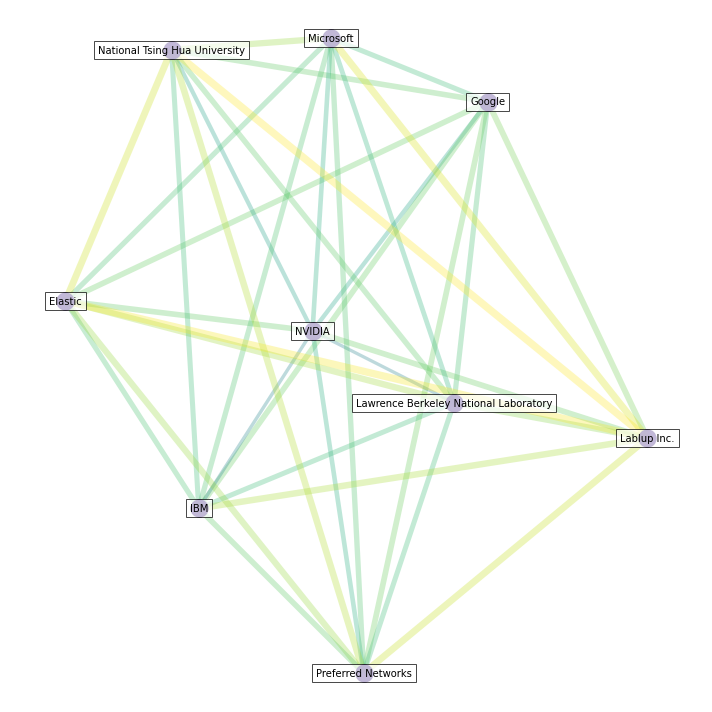

,Google,NVIDIA,Microsoft,Lawrence Berkeley National Laboratory,National Tsing Hua University,Elastic,IBM,Preferred Networks,Lablup Inc.
Google,0.000000,2.177681,2.533440,2.600907,2.787917,2.822384,2.823263,2.848352,2.941594
NVIDIA,2.177681,0.000000,2.313475,1.644294,2.125368,2.799286,1.694858,2.314324,2.845806
Microsoft,2.533440,2.313475,0.000000,2.398616,3.140265,2.616632,2.661092,2.678526,3.505720
Lawrence Berkeley National Laboratory,2.600907,1.644294,2.398616,0.000000,2.759797,3.192677,2.512974,2.528834,3.041808
National Tsing Hua University,2.787917,2.125368,3.140265,2.759797,0.000000,3.431328,2.532783,3.290767,3.717006
Elastic,2.822384,2.799286,2.616632,3.192677,3.431328,0.000000,2.628802,3.148796,3.659732
IBM,2.823263,1.694858,2.661092,2.512974,2.532783,2.628802,0.000000,2.785040,3.236730
Preferred Networks,2.848352,2.314324,2.678526,2.528834,3.290767,3.148796,2.785040,0.000000,3.394205
Lablup Inc.,2.941594,2.845806,3.505720,3.041808,3.717006,3.659732,3.236730,3.394205,0.000000


In [ ]:
def CompSim_2(name): 
  LP = list(vec.Inc.unique())
  distanceMatrix = dm.values 
  index = LP.index(name)  
  sortingL = []
  for i in range(0,224):
    sortingL.append((distanceMatrix[index][i],LP[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=False)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = distanceMatrix[res2[i]][res2[j]]
  forComp = pd.DataFrame(resMatrix,compName,compName)
  
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*2)

 

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'



  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp
 

CompSim_2('Google')

In [ ]:
df[df['Inc'] == 'Amazon']['Keywords'].values

In [ ]:
df[df['Inc'] == 'NVIDIA']['Keywords'].values

In [ ]:
df[df['Inc'] == 'IBM']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Google']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Amazon Web Services']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Preferred Networks']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Lawrence Berkeley National Laboratory']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Microsoft']['Keywords'].values

In [ ]:
vec[vec['Inc'] == 'Amazon']

In [ ]:
a = vec[vec['Inc'] == 'NVIDIA']

In [ ]:
np.zeros((54,54))
extract[i]

In [ ]:

extract = a.values
distanceMatrix = np.zeros((54, 54))
for i in range(0,54):
 for j in range(0,54):
   distanceMatrix[i][j] = np.linalg.norm(extract[i] - extract[j])
   print([i,j])
pd.DataFrame(distanceMatrix)

In [ ]:
np.where(CN == 'Google')

In [ ]:
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*20)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]

  fig, ax = plt.subplots(figsize=(15, 15))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
node_trace

In [ ]:
edge_trace

In [ ]:
pos = nx.kamada_kawai_layout(H)
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd

a = pd.read_csv('similarityMatrix.csv')
companyName = []
for col in a.columns:
  companyName.append(col)
companyName
pd.DataFrame(companyName.to_csv('companyName.csv',index = False)

In [ ]:
refineMatrix = pd.DataFrame(a.values,companyName,companyName)
refineMatrix.to_csv('refineMatrix.csv',index = False)

In [ ]:
! pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

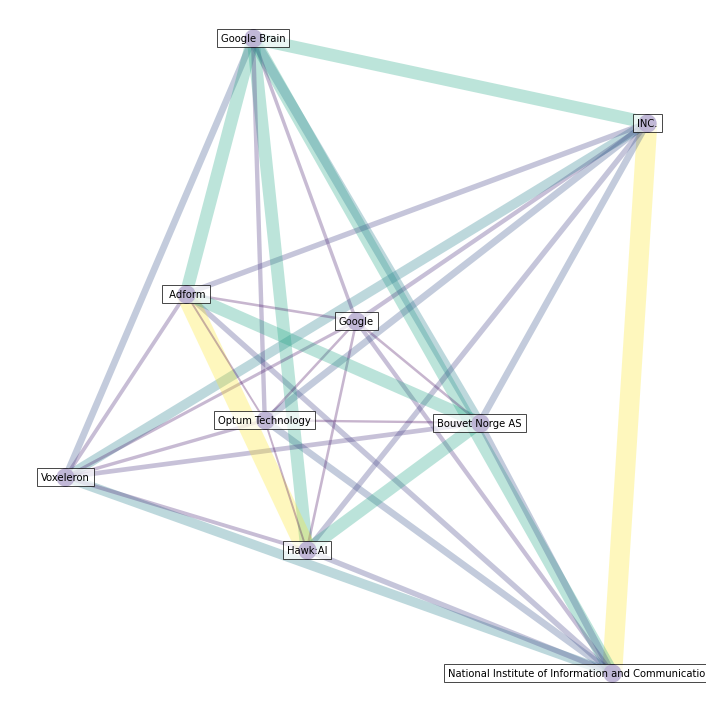

,National Institute of Information and Communications Technology,INC.,Google Brain,Google,Voxeleron,Adform,Hawk:AI,Bouvet Norge AS,Optum Technology
National Institute of Information and Communications Technology,1.000000,1.000000,0.635953,0.215609,0.484144,0.271905,0.271905,0.335886,0.340216
INC.,1.000000,1.000000,0.635953,0.215609,0.484144,0.271905,0.271905,0.335886,0.340216
Google Brain,0.635953,0.635953,0.635953,0.172590,0.337789,0.635953,0.635953,0.481178,0.218784
Google,0.215609,0.215609,0.172590,0.170047,0.152268,0.129572,0.129572,0.127003,0.125339
Voxeleron,0.484144,0.484144,0.337789,0.152268,0.448857,0.191434,0.191434,0.234399,0.169966
Adform,0.271905,0.271905,0.635953,0.129572,0.191434,1.000000,1.000000,0.626470,0.097352
Hawk:AI,0.271905,0.271905,0.635953,0.129572,0.191434,1.000000,1.000000,0.626470,0.097352
Bouvet Norge AS,0.335886,0.335886,0.481178,0.127003,0.234399,0.626470,0.626470,0.626470,0.117259
Optum Technology,0.340216,0.340216,0.218784,0.125339,0.169966,0.097352,0.097352,0.117259,0.339113


In [ ]:
companyList = pd.read_csv('companyName.csv')
similarityMatrix = pd.read_csv('refineMatrix.csv')
b = companyList.values
e = []
for sublist in b:
  for item in sublist:
    e.append(item)

def CompSim(name): 
  initializeMatrix = similarityMatrix.values 
  index = e.index(name)
  sortingL = []
  for i in range(0,len(e)):
    sortingL.append((initializeMatrix[index][i],e[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=True)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = initializeMatrix[res2[i]][res2[j]]

  forComp = pd.DataFrame(resMatrix,compName,compName)
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*20)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'

  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp
 

CompSim('Google')

In [ ]:
df[df['Inc'] == 'Hazelcast']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values

In [ ]:
df[df['Inc'] == 'Datatonic']['Keywords'].values